# 프로젝트 제출

이 파일은, aiffel 2022년도 3기의 노드 중 하나인
 - EXPLORATION_SO3 : 1. Iris의 세 가지 품종, 분류해볼 수 있겠어요?
 
와 관련한 프로젝트입니다.
(저는 aiffel 교육생 김선중 입니다.)

프로젝트 결과물은 다음과 같이 구성해보았습니다.

## 목차
1. 사전 설명
    
    1.1. 목적
    
    1.2. 요약

    1.3. evaluation metric들에 대한 설명


2. 각 dataset에 대하여 분류문제 수행

    2.1. `digits` dataset
    
    2.2. `wine` dataset
    
    2.3. `breast_cancer` dataset


2. 결론

# 1. 사전 설명

## 1.1. 목적

`sklearn`에서 불러올 수 있는 세 개의 dataset `load_digits()`, `load_wine()`, `load_breast_cancer()`에 대하여 (이하 `digits`, `wine`, `breast_cancer`)
다섯 가지 종류의 모델(`decision tree`, `random forest`, `suppoer vector machine`,`stochastic gradient descent classifier`, `logistic regression`)을 사용하여 분류 문제를 수행합니다.

|평가문항|상세기준|
|:-|:-|
|데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?|feature와 label 선정을 위한 데이터 분석과정을 전개함|
|데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?|모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음|
|데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?|모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음|

평가문항이 위와 같으므로 (1) 데이터셋의 구성을 파악하고 데이터를 이해하는 과정, (2) 5가지 모델을 사용하여 학습을 수행하고결과를 얻는 것, (3) 각각의 데이터셋에 대하여 모델의 평가 지표를 선정해보려 했습니다.

각 모델의 평가지표를 출력할 때에 노드 중에 포함되어 있는 `accuracy_score(y_test, y_pred)`와 같은 코드는 쓰지 않고 `print(classification_report(y_test, y_pred))`와 같은 코드로만 사용했습니다.
전자는 accuracy만 출력하지만 후자는 accuracy를 포함한 다양한 평가지표를 모두 출력하므로 더 낫다고 판단했습니다.

각각의 코드 아래에는 markdown으로 설명을 적어보았습니다.

## 1.2. 요약

# 2. 각 dataset에 대하여 분류문제 수행

## 1.2. `digits` dataset

### 1.2.1 필요한 모듈 import 하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm`
from sklearn.linear_model import SGDClassifier, LogisticRegression # _sgd,  _lr
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

모듈들을 import합니다.
 아래 모듈들은 주로 `sklearn`에서 제공하는 모듈들입니다.
 - line 1 : `digits` dataset을 불러오기 위해 `load_digits` 모듈을 import합니다.
 - line 2 ~ 3 : 데이터의 전처리과정을 위해 `train_test_split`, `preprocessing` 모듈을 import합니다.
 - line 4 ~ 8 : 다섯 개의 서로 다른 모델 (decision tree classifier, random forest classifier, support vector machine, stochastic gradient descent classifier, logistic regression)을 사용하기 위해 해당 모듈들을 import합니다.
 - line 9 : 모델의 평가지표를 한번에 불러오기 위해 `classification_report` 모듈을 import합니다.
 - line 10 ~ 12 : numpy와 matplotlib, pandas를 import합니다.

### 1.2.2 데이터 준비

In [2]:
digits = load_digits()
print(type(digits))
# print(digits)
print(dir(digits))
print(digits.keys())

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


 - line 1 : `load_digits()`으로 데이터를 불러와 `digits`에 할당합니다.
 - line 2, 3 : `digits`는 `sklearn.utils.Bunch`라는 타입을 가지고 있는데, [이것](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)은 `sklearn`에서 딕셔너리와 같은 역할을 하는 클래스인 것 같습니다.
 - line 4 : 파이썬의 내장함수 [`dir()`](https://docs.python.org/ko/3/library/functions.html#dir)을 사용합니다.
 - line 5 : `digits`의 키값을 `keys()` 메소드를 통해 호출합니다.
 `digits`의 key들이 나열되는데, 이 중 `data`, `target`, `target_names`, `DESCR`, `feature_names`를 살펴볼 예정입니다.
 노드에서의 `iris` dataset에 비교하면, `filename`이 없습니다.

### 1.2.3 데이터 이해하기

In [3]:
digits_data = digits.data
digits_label = digits.target

`digits_data`와 `digits_label`을 정의합니다.
 각각 input feature와 label의 역할을 하게 될 것들입니다.

In [4]:
print(type(digits_data))
print(digits_data.shape)
print(digits_data[0])
print(digits_data.max())

<class 'numpy.ndarray'>
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
16.0


`digits_data`의 타입과 shape, 첫번째 요소를 출력합니다.
 - line 1 : 타입은 `np.array`입니다.
 - line 2 : shape으로 보아 $1797\times 64$ 모양의 행렬입니다.
 즉, data(sample)의 개수는 1797개이고, feature는 64개입니다.
 feature의 개수가 64개인 것은, 각각의 sample들이 $8\times8$의 픽셀을 가진 그림파일이기 때문입니다.
 - line 3, 4 : 첫번째 sample을  출력하니 16차원의 벡터가 나옵니다.
 많이 쓰이는 MNIST dataset이 0부터 255까지의 정수를 가지는 것과 달리, 여기에서는 0부터 15까지의 숫자가 보입니다.
 실제로 `digits_data` 행렬에서 entry의 최댓값을 구해보니 16이 나오는 걸로 봐서, 255까지의 정수가 아닌 16까지의 정수를 고려하는 것으로 보입니다.

첫번째 sample을 그림으로 나타내면 다음과 같습니다.

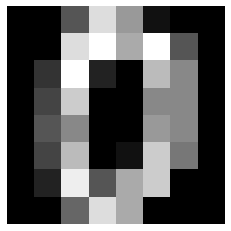

In [5]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [6]:
print(type(digits_label))
print(digits_label.shape)
print(digits_label[0])

<class 'numpy.ndarray'>
(1797,)
0


`digits_label`의 타입과 shape, 첫번째 요소를 출력합니다.
 - line 1 : 타입은 `np.array`입니다.
 - line 2 : shape으로 보아 1797 차원의 벡터라고 생각할 수 있습니다.
 각각의 sample들의 label은 $\{0,1,2,3,4,5,6,7,8,9\}$의 원소입니다.

In [7]:
print(digits.target_names)
print(digits.feature_names)
# print(digits.filename)
print(digits.DESCR)

[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteris

 - line 1 : label들의 이름을 출력합니다.
 방금 언급했듯 label은 $\{0,1,2,3,4,5,6,7,8,9\}$의 원소입니다.
 - line 2 : feature들의 이름을 출력합니다.
 위에 언급했듯, feature들은 $8\times8$의 그림파일의 각 픽셀값을 나타냅니다. 그걸 반영하듯 feature의 이름들이 `'pixel_2_3'`와 같이 되어 있습니다.
 좌표 (2,3)의 픽셀값이라는 뜻입니다.
 픽셀값이 0이면 해당 픽셀이 검은색을 나타내고 픽셀값이 높아질수록 흰색에 가까운 색을 나타냅니다.
 - line 3 : 2번 셀에서 말했듯 `filename`은 불러올 수 없습니다.
 - line 4 : `digits` dataset에 대한 상세한 정보를 출력합니다.

### 1.2.4 train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=1)

 - 우리는 데이터 `digits`에서 각각 `digits_data`, `digits_label`를 얻었었습니다.
 이것들을 각각 8:2의 비율로 잘라, training set과 test set으로 나눕니다.
 즉
    - `digits_data` → `X_train`, `X_test`
    - `digits_label` → `y_train`, `y_test`
 
 와 같이 나눕니다.

In [9]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

<class 'numpy.ndarray'>
(1437, 64)
[ 0.  0.  0.  2. 15.  8.  0.  0.  0.  0.  1. 15. 13.  3.  0.  0.  0.  0.
  9. 13.  1.  0.  0.  0.  0.  1. 15.  6.  0.  5. 11.  0.  0.  7. 14.  0.
  1. 15.  8.  0.  0.  8. 15.  9. 15. 16.  3.  0.  0.  1. 11. 16. 16. 10.
  0.  0.  0.  0.  0.  2. 15.  5.  0.  0.]
<class 'numpy.ndarray'>
(360, 64)
[ 0.  0.  6. 16. 11.  0.  0.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  4.  0.  0.  0.  0. 10. 16. 13.  0.  0.  0.  0.  0. 13. 16.
 12.  0.  0.  0.  0.  0. 10. 16.  9.  0.  0.  0.  0.  0.  9. 16. 10.  0.
  0.  0.  0.  0.  4. 15. 16.  3.  0.  0.]
<class 'numpy.ndarray'>
(1437,)
4
<class 'numpy.ndarray'>
(360,)
1


네 개의 서로다른 `np.array`들에 대하여 타입과 shape, 첫번째 요소를 출력해봅니다.
 - line 1 ~ 3 : `X_train`은 $1437\times 64$ 형태의 행렬입니다.
 열의 개수, 즉 feature의 개수는 당연히 64로 일정하고 행의 개수는 1797에서 1437개로 약 80%가 되었습니다.
 정확히 계산해보면 $1797\times 0.8=1437.6$이므로 1797에 0.8을 곱한 후 `floor()`같은 것을 씌워 정수부분만 출력한 듯합니다.
 [공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)에는 정확히 나와있지 않습니다.
 - line 5 ~ 7 : `X_test`은 $360\times 64$ 형태의 행렬입니다.
 - line 9 ~ 11 : `y_train`은 1437차원의 벡터입니다.
 - line 13 ~ 15 : `y_test`은 360차원의 벡터입니다.

#### 표준화(standardization)

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler.mean_)
print(scaler.scale_)

[0.00000000e+00 3.04105776e-01 5.23312457e+00 1.18559499e+01
 1.18469033e+01 5.78705637e+00 1.41057759e+00 1.28740431e-01
 3.47947112e-03 1.97494781e+00 1.04272791e+01 1.20508003e+01
 1.03145442e+01 8.15100905e+00 1.87265136e+00 1.07863605e-01
 2.78357690e-03 2.57967989e+00 9.95685456e+00 7.08907446e+00
 7.16144746e+00 7.85316632e+00 1.79610299e+00 5.01043841e-02
 1.39178845e-03 2.48712596e+00 9.05288796e+00 8.90953375e+00
 1.00981211e+01 7.50034795e+00 2.27696590e+00 1.39178845e-03
 0.00000000e+00 2.30688935e+00 7.68823939e+00 9.25400139e+00
 1.03799582e+01 8.64509395e+00 2.86430063e+00 0.00000000e+00
 9.04662491e-03 1.51078636e+00 6.86778010e+00 7.33472512e+00
 7.66597077e+00 8.10160056e+00 3.46068198e+00 2.71398747e-02
 9.04662491e-03 6.96590118e-01 7.42171190e+00 9.62073765e+00
 9.39665971e+00 8.64300626e+00 3.73764788e+00 2.01113431e-01
 6.95894224e-04 2.86012526e-01 5.55671538e+00 1.21183020e+01
 1.17153793e+01 6.69102296e+00 2.05567154e+00 3.47251218e-01]
[1.         0.90544851 

In [11]:
X_train_stan = scaler.transform(X_train)
X_test_stan = scaler.transform(X_test)

In [12]:
print(type(X_train_stan))
print(X_train_stan.shape)
print(X_train_stan[0])

print(type(X_test_stan))
print(X_test_stan.shape)
print(X_test_stan[0])

<class 'numpy.ndarray'>
(1437, 64)
[ 0.         -0.33586203 -1.10017452 -2.32978146  0.73976343  0.38813303
 -0.41648296 -0.12945485 -0.04991522 -0.62810365 -1.73898453  0.75007823
  0.56326513 -0.85564297 -0.52324996 -0.1315381  -0.04311807 -0.7311589
 -0.16863817  1.01961119 -1.00288033 -1.26659687 -0.54675418 -0.11861824
 -0.03733267 -0.46653546  0.95768973 -0.49846984 -1.66027444 -0.42466618
  2.3871721  -0.03733267  0.          1.36795042  1.00165778 -1.47964578
 -1.59111899  1.07500911  1.4593525   0.         -0.05806465  2.26558545
  1.24632023  0.25869065  1.1800553   1.37472954 -0.10599477 -0.09095581
 -0.03963009  0.17495652  0.63429529  1.2177293   1.2469861   0.22339772
 -0.75578905 -0.20882103 -0.02638899 -0.30430272 -1.08978156 -2.33532938
  0.66065318 -0.28617718 -0.5051025  -0.19346158]
<class 'numpy.ndarray'>
(360, 64)
[ 0.         -0.33586203  0.16122238  0.97958403 -0.19869612 -1.01500449
 -0.41648296 -0.12945485 -0.04991522 -0.62810365 -0.26328023  1.00441103
  1.19

#### 정규화(normalization)

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_train_norm

array([[0.    , 0.    , 0.    , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.8125, 0.75  , 0.125 ],
       ...,
       [0.    , 0.    , 0.4375, ..., 0.8125, 0.125 , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.0625, 0.    ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ]])

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_train_norm

array([[0.    , 0.    , 0.    , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.8125, 0.75  , 0.125 ],
       ...,
       [0.    , 0.    , 0.4375, ..., 0.8125, 0.125 , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.0625, 0.    ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ]])

In [15]:
X_test_norm = min_max_scaler.transform(X_test)
X_test_norm

array([[0.    , 0.    , 0.375 , ..., 0.1875, 0.    , 0.    ],
       [0.    , 1.    , 0.8125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.25  , ..., 0.375 , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.375 , 0.9375, ..., 1.    , 1.    , 0.125 ],
       [0.    , 0.    , 0.5   , ..., 0.    , 0.    , 0.    ]])

In [16]:
from sklearn.metrics import plot_confusion_matrix

In [18]:
classifiers = [DecisionTreeClassifier(random_state=1), 
               RandomForestClassifier(random_state=1),
               svm.SVC(random_state=1), 
               SGDClassifier(random_state=1)]
for cls in classifiers:
    cls.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

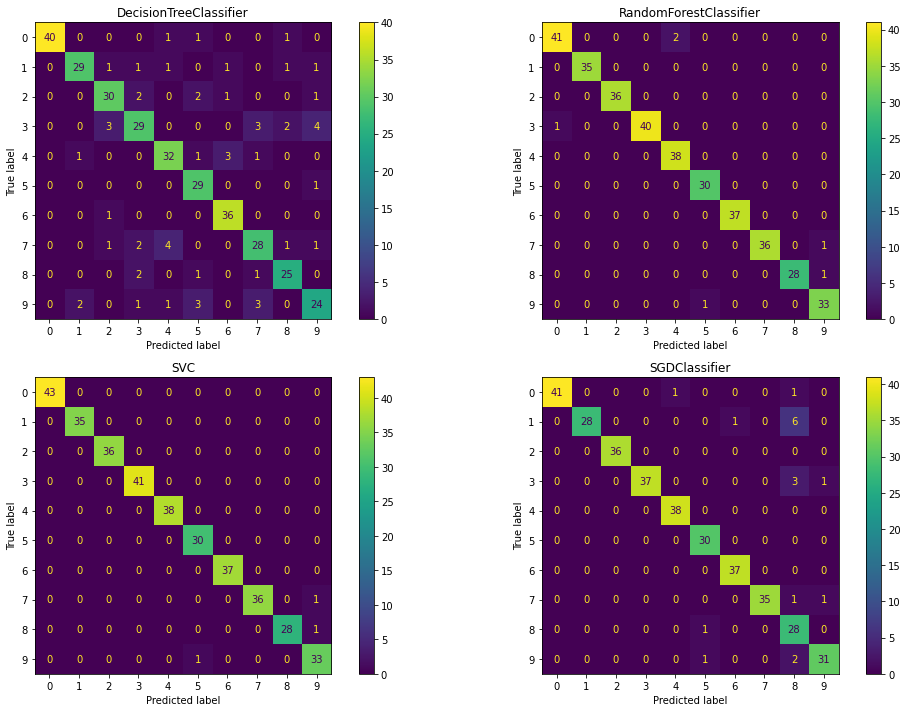

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax,
                         display_labels = digits.target_names)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()


### 1.11.5. 다양한 모델로 학습시켜보기

여기에서는 다섯 개의 모델
 - decision tree classifier # _dt
 - random forest classifier # _rf
 - support vector machine # _svm
 - stochastic gradient descent classfier # sgd
 - logistic regression # _lr
 
을 가지고 학습을 진행시키고, 그 결과로 여러 평가지표를 얻는 작업을 수행합니다.
평가지표는 `y_pred_dt`와 같은 이름으로 출력됩니다.
이때, 각각의 모델들에 따라 `y_pred`의 뒤에 접두어 `dt`를 붙였습니다.
예를 들어, `dt`는 decision tree라는 뜻입니다.
 
<!-- 이 과정을 앞으로 세 번 반복할 것이고, 또 어차피 결과적으로
 - `y_pred_dt`
 - `y_pred_rf`
 - `y_pred_svm`
 - `y_pred_sgd`
 - `y_pred_lr`

의 다섯개만 잘 출력하면 되므로 이 과정을 하나의 함수 `get_y_pred`로 지정해놓았습니다. -->

In [ ]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [ ]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [ ]:
# logistic regerssion
# _lr
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)
# y_pred_lr = logistic_model.predict(X_test) # convergence warning

logistic_model = LogisticRegression()
logistic_model.fit(X_train_stan, y_train)
y_pred_lr = logistic_model.predict(X_test_stan)

# logistic_model = LogisticRegression() # convergence warning
# logistic_model.fit(X_train_norm, y_train)
# y_pred_lr = logistic_model.predict(X_test_norm)

 - `random_state` logistic regession을 제외한 각각의 모델들은 어느 정도의 임의성(randomness)을 수반합니다.
 그 임의성은 각 알고리즘마다 작용되는 원리가 다 다릅니다.
 예를 들어 `RandomForestClassifier`의 `random_state`에 관해서는 [다음과 같은 설명](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)을 찾을 수 있는 반면
 > Controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node
 
 `SGDClassifier`에 관해서는 [다른 설명](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)이 검색됩니다.
 > Used for shuffling the data, when shuffle is set to `True`.
 정확히 말하면, `LogisticRegression` 모델도 `random_state`라는 인자를 갖기는 하지만, [사실상 사용되지 않는다고도 합니다.](https://github.com/scikit-learn/scikit-learn/issues/4760)
 
 - `LogisticRegression` 모델에 대해서는 기존과는 다른 데이터(`X_train_stan`, `X_test_stan`)를 넣었습니다.
 이것들은 기존의 `X_train`과 `X_test`에 standardization을 적용한 결과입니다.
 이렇게 넣은 이유는, 그냥 `X_train`과 `X_test`를 넣었을 때에 다음과 같은 경고 메시지가 뜨기 때문이었습니다.
 ```
 /opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 ```
 
 한용님의 조언을 받아 (아니면 경원퍼실님일지도 모르겠습니다.) standardization을 수행하여 `X_train_stan`과 `X_test_stan`을 넣었고, 경고 메시지가 더이상 뜨지 않고 있습니다. minmax를 이용한 normalization도 해봤는데 이 경우에는 별다른 성과를 얻지 못했습니다. 

### 1.11.6. 모델을 평가해보기

In [ ]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
disp.figure_.suptitle("Confusion Matrix : digits")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

## 1.12. 프로젝트 (2) load_wine : 와인을 분류해 봅시다 

### 1.12.1 필요한 모듈 import 하기

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm
from sklearn.linear_model import SGDClassifier # _sgd
from sklearn.linear_model import LogisticRegression # _lr
from sklearn.metrics import classification_report

### 1.12.2 데이터 준비

In [ ]:
wine = load_wine()

In [ ]:
print(dir(wine))
print(wine.keys())

### 1.12.3 데이터 이해하기

In [ ]:
wine_data = wine.data
wine_label = wine.target

In [ ]:
print(type(wine_data))
print(wine_data.shape)
print(wine_data[0])

In [ ]:
print(type(wine_label))
print(wine_label.shape)
print(wine_label[0])

In [ ]:
print(wine.target_names)
print(wine.DESCR)
print(wine.feature_names)
# print(wine.filename)

### 1.12.4 train, test 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [ ]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

### 1.12.5. 다양한 모델로 학습시켜보기

In [ ]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [ ]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [ ]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

### 1.12.6. 모델을 평가해보기

In [ ]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))

## 1.13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### 1.13.1 필요한 모듈 import 하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # _dt
from sklearn.ensemble import RandomForestClassifier # _rf
from sklearn import svm # _svm
from sklearn.linear_model import SGDClassifier # _sgd
from sklearn.linear_model import LogisticRegression # _lr
from sklearn.metrics import classification_report

### 1.13.2 데이터 준비

In [ ]:
breast_cancer = load_breast_cancer()

In [ ]:
print(dir(breast_cancer))
print(breast_cancer.keys())

### 1.13.3 데이터 이해하기

In [ ]:
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

In [ ]:
print(type(breast_cancer_data))
print(breast_cancer_data.shape)
print(breast_cancer_data[0])

In [ ]:
print(type(breast_cancer_label))
print(breast_cancer_label.shape)
print(breast_cancer_label[0])

In [ ]:
print(breast_cancer.target_names)
print(breast_cancer.DESCR)
print(breast_cancer.feature_names)
# print(breast_cancer.filename)

### 1.13.4 train, test 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [ ]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])

print(type(X_test))
print(X_test.shape)
print(X_test[0])

print(type(y_train))
print(y_train.shape)
print(y_train[0])

print(type(y_test))
print(y_test.shape)
print(y_test[0])

### 1.13.5. 다양한 모델로 학습시켜보기

In [ ]:
# decision tree
# _dt
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [ ]:
# random forest
# _rf
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [ ]:
# support vector machine
# _svm
svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# stochastic gradient descent classifier
# sgd
sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

In [ ]:
# logistic regerssion
# _lr
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

### 1.13.6. 모델을 평가해보기

In [ ]:
print(classification_report(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_lr))